## Бутстрап
Бутстрап позволяет многократно извлекать подвыборки из выборки, полученной в рамках экспериментва

В полученных подвыборках считаются статистики (среднее, медиана и т.п.)

Из статистик можно получить ее распределение и взять доверительный интервал

ЦПТ, например, не позволяет строить доверительные интервал для медианы, а бутстрэп это может сделать

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
import seaborn as sns

plt.style.use('ggplot')

In [2]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

In [3]:
# будем пробовать бутстрап на эксп. распределении
np.random.seed(5)

In [4]:
n = 1000

sample_1 = np.random.exponential(scale=1/0.001, size=n)
sample_2 = np.random.exponential(scale=1/0.00101, size=n)

df = pd.DataFrame({
    "sample_1": sample_1,
    "sample_2": sample_2
})

  0%|          | 0/1000 [00:00<?, ?it/s]

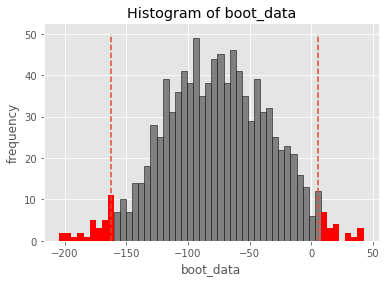

In [5]:
booted_data = get_bootstrap(df.sample_1, df.sample_2) # в результате хранится разница двух распределений, ДИ и pvalue

In [6]:
booted_data["p_value"] # альфа

0.07704553867678232

In [7]:
booted_data["quants"] # ДИ

,0
0.025,-161.943418
0.975,5.328283


In [8]:
data_ab = pd.read_csv('data//hw_bootstrap.csv', sep=';', decimal=',')

<AxesSubplot:xlabel='experimentVariant', ylabel='value'>

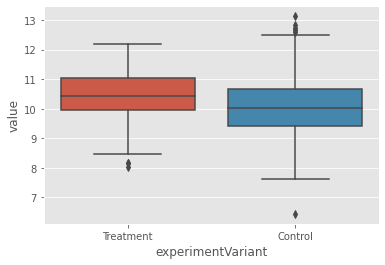

In [9]:
sns.boxplot(x="experimentVariant", y="value", data=data_ab)

In [10]:
mannwhitneyu(data_ab[data_ab.experimentVariant == 'Treatment'].value, 
             data_ab[data_ab.experimentVariant == 'Control'].value)

MannwhitneyuResult(statistic=9508.0, pvalue=0.0026182097937983984)

In [11]:
ttest_ind(data_ab[data_ab.experimentVariant == 'Treatment'].value, 
             data_ab[data_ab.experimentVariant == 'Control'].value)

Ttest_indResult(statistic=2.3318589655730135, pvalue=0.02006953912735476)

  0%|          | 0/1000 [00:00<?, ?it/s]

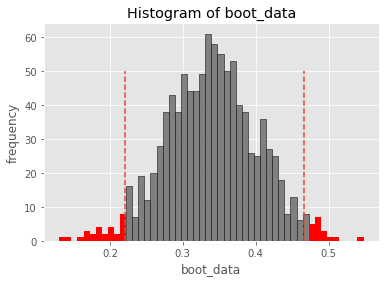

In [12]:
plt_2 = get_bootstrap(
    data_ab[data_ab.experimentVariant == 'Treatment'].value, # числовые значения первой выборки
    data_ab[data_ab.experimentVariant == 'Control'].value, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
)

  0%|          | 0/1000 [00:00<?, ?it/s]

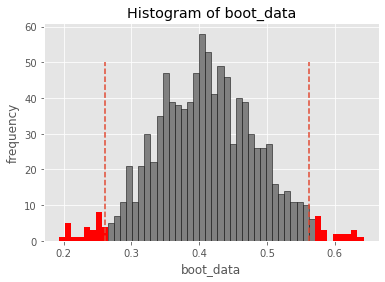

In [13]:
plt = get_bootstrap(
    data_ab[data_ab.experimentVariant == 'Treatment'].value, # числовые значения первой выборки
    data_ab[data_ab.experimentVariant == 'Control'].value, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.median, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
)

**Пермутационный критерий (тест)**  — такой статистический критерий, при котором в ходе проверки гипотезы вероятность ошибки первого рода всегда равна уровню значимости. Соответственно, можно рассчитать точное p-значение (англ. exact p-value). Точные тесты не используют приближения большой выборки (асимптотики при размере выборки, стремящемся к бесконечности).

In [28]:
group1 = [83, 91, 79]
group2 = [68, 74, 72]
group_together = list(set(group1)| set(group2))
group_together

[83, 68, 72, 74, 91, 79]

In [ ]:
'''population mean of group1 if greter than group1 ?'''

In [29]:
import numpy as np

79.66666666666667

In [30]:
mean_of_one = np.mean(group1)

In [31]:
from itertools import combinations
perm_set = combinations(group_together, 3)
box = []
for i in perm_set:
    mean_of_sample = np.mean(i)
    box.append([i,
           mean_of_sample, 
           'Yes' if mean_of_sample >= mean_of_one else 'NO'])
# Источник: https://pythonim.ru/osnovy/perestanovki-kombinatsii-python

In [32]:
import pandas as pd
df = pd.DataFrame(box, columns = ['combination', 'mean', 'as_more_Extrime'])
# .query()
p_value = df.query('as_more_Extrime == "Yes"').shape[0] / df.shape[0]
p_value

0.05

array([[<AxesSubplot:title={'center':'mean'}>]], dtype=object)

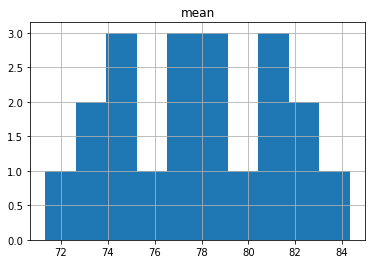

In [34]:
df.hist()